In [2]:
from google.colab import drive
import cv2 as cv
import glob
import numpy as np
from tqdm import tqdm
import glob

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
def calibrate_camera(images_folder):
    print("starting...")
    images_names = sorted(glob.glob(images_folder))[:200]
    images = []
    for imname in tqdm(images_names):
        im = cv.imread(imname, 1)
        images.append(im)

    #criteria used by checkerboard pattern detector.
    #Change this if the code can't find the checkerboard
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    rows = 10 #number of checkerboard rows.
    columns = 15 #number of checkerboard columns.
    world_scaling = 1. #change this to the real world square size. Or not.

    #coordinates of squares in the checkerboard world space
    objp = np.zeros((rows*columns,3), np.float32)
    objp[:,:2] = np.mgrid[0:rows,0:columns].T.reshape(-1,2)
    objp = world_scaling* objp

    #frame dimensions. Frames should be the same size.
    width = images[0].shape[1]
    height = images[0].shape[0]

    #Pixel coordinates of checkerboards
    imgpoints = [] # 2d points in image plane.

    #coordinates of the checkerboard in checkerboard world space.
    objpoints = [] # 3d point in real world space


    for frame in tqdm(images):
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        #find the checkerboard
        ret, corners = cv.findChessboardCorners(gray, (rows, columns), None)

        if ret == True:

            #Convolution size used to improve corner detection. Don't make this too large.
            conv_size = (7, 7)

            #opencv can attempt to improve the checkerboard coordinates
            corners = cv.cornerSubPix(gray, corners, conv_size, (-1, -1), criteria)
            cv.drawChessboardCorners(frame, (rows,columns), corners, ret)
            #cv.imshow('img', frame)
            #k = cv.waitKey(100)

            objpoints.append(objp)
            imgpoints.append(corners)
    #cv.destroyAllWindows()

    print("COMPUTING...")
    ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, (width, height), None, None)

    # num_images = len(imgpoints)
    # with tqdm(total=num_images) as pbar:
    #     ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, (width, height), None, None)
    #     pbar.update(1)  # Update progress bar once calibration is complete

    print('rmse:', ret)
    print('camera matrix:\n', mtx)
    print('distortion coeffs:', dist)
    print('Rs:\n', rvecs)
    print('Ts:\n', tvecs)
    print("SUCCESS")
    return mtx, dist

mtx1, dist1 = calibrate_camera("/content/drive/MyDrive/Computer Vision/camera_calibration/Images/Left/*")
print("-"*100)
mtx2, dist2 = calibrate_camera("/content/drive/MyDrive/Computer Vision/camera_calibration/Images/Right/*")

starting...


100%|██████████| 200/200 [00:05<00:00, 35.05it/s]


COMPUTING...
rmse: 0.510740433112241
camera matrix:
 [[661.08096423   0.         311.15375706]
 [  0.         663.44602456 193.02387752]
 [  0.           0.           1.        ]]
distortion coeffs: [[-0.37382562  0.12340864  0.00248215 -0.00041033 -0.01638066]]
Rs:
 (array([[0.51697355],
       [0.29816191],
       [0.45589125]]), array([[ 0.11092218],
       [-0.09403491],
       [-1.54318999]]), array([[-0.08433635],
       [ 0.28029273],
       [-1.48077947]]), array([[ 0.40316155],
       [-0.08935694],
       [-1.61383455]]), array([[ 0.39789736],
       [-0.18767514],
       [-1.63906541]]), array([[ 0.07880678],
       [ 0.1531451 ],
       [-1.91409253]]), array([[-0.1901899 ],
       [ 0.28573074],
       [-1.35539365]]), array([[-0.19138132],
       [ 0.2580453 ],
       [-1.25749374]]), array([[-0.10688003],
       [ 0.1613812 ],
       [-1.52784367]]), array([[-0.18662704],
       [-0.06138381],
       [-1.55573083]]), array([[-0.09264044],
       [ 0.02746947],
       [-1

100%|██████████| 200/200 [00:26<00:00,  7.63it/s]


COMPUTING...
rmse: 0.8726980714260762
camera matrix:
 [[574.35284043   0.         340.7937652 ]
 [  0.         574.34779573 232.75837019]
 [  0.           0.           1.        ]]
distortion coeffs: [[-0.32876822  0.02580346 -0.00201986 -0.00439741  0.09212148]]
Rs:
 (array([[0.44307585],
       [0.3320138 ],
       [0.47641758]]), array([[ 0.07647684],
       [-0.13188732],
       [-1.49895372]]), array([[-0.15941583],
       [ 0.21036469],
       [-1.45258669]]), array([[ 0.04343597],
       [ 0.07495478],
       [-1.87959629]]), array([[-0.26691491],
       [ 0.24450985],
       [-1.33062601]]), array([[-0.12954989],
       [ 0.12587633],
       [-1.53315496]]), array([[-0.2353399 ],
       [-0.10255624],
       [-1.51789111]]), array([[-0.14045961],
       [-0.0054845 ],
       [-1.53451601]]), array([[ 0.08493384],
       [-0.13401659],
       [-0.03739815]]), array([[ 0.11418658],
       [-0.04023834],
       [-0.08174487]]), array([[-0.04856509],
       [ 0.04025037],
       [-

In [36]:
def calibrate_camera(images_folder):
    print("starting...")
    images_names = sorted(glob.glob(images_folder))
    images = []
    for imname in tqdm(images_names):
        im = cv.imread(imname, 1)
        images.append(im)

    #criteria used by checkerboard pattern detector.
    #Change this if the code can't find the checkerboard
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    rows = 10 #number of checkerboard rows.
    columns = 15 #number of checkerboard columns.
    world_scaling = 1. #change this to the real world square size. Or not.

    #coordinates of squares in the checkerboard world space
    objp = np.zeros((rows*columns,3), np.float32)
    objp[:,:2] = np.mgrid[0:rows,0:columns].T.reshape(-1,2)
    objp = world_scaling* objp

    #frame dimensions. Frames should be the same size.
    width = images[0].shape[1]
    height = images[0].shape[0]

    #Pixel coordinates of checkerboards
    imgpoints = [] # 2d points in image plane.

    #coordinates of the checkerboard in checkerboard world space.
    objpoints = [] # 3d point in real world space


    for frame in tqdm(images):
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        #find the checkerboard
        ret, corners = cv.findChessboardCorners(gray, (rows, columns), None)

        if ret == True:

            #Convolution size used to improve corner detection. Don't make this too large.
            conv_size = (7, 7)

            #opencv can attempt to improve the checkerboard coordinates
            corners = cv.cornerSubPix(gray, corners, conv_size, (-1, -1), criteria)
            cv.drawChessboardCorners(frame, (rows,columns), corners, ret)
            #cv.imshow('img', frame)
            #k = cv.waitKey(100)

            objpoints.append(objp)
            imgpoints.append(corners)
    #cv.destroyAllWindows()

    print("COMPUTING...")
    ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, (width, height), None, None)

    # num_images = len(imgpoints)
    # with tqdm(total=num_images) as pbar:
    #     ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, (width, height), None, None)
    #     pbar.update(1)  # Update progress bar once calibration is complete

    print('rmse:', ret)
    print('camera matrix:\n', mtx)
    print('distortion coeffs:', dist)
    print('Rs:\n', rvecs)
    print('Ts:\n', tvecs)
    print("SUCCESS")
    return mtx, dist

mtx1, dist1 = calibrate_camera("/content/drive/MyDrive/Computer Vision/camera_calibration/Images/Left/*")
print("-"*100)
mtx2, dist2 = calibrate_camera("/content/drive/MyDrive/Computer Vision/camera_calibration/Images/Right/*")

starting...


100%|██████████| 297/297 [00:07<00:00, 37.51it/s]


COMPUTING...
rmse: 0.46325373100174005
camera matrix:
 [[663.20332762   0.         313.71809411]
 [  0.         665.14185247 194.74614921]
 [  0.           0.           1.        ]]
distortion coeffs: [[-0.36611607  0.1071513   0.00166707  0.00037189  0.00557993]]
Rs:
 (array([[0.51804205],
       [0.29456324],
       [0.45733706]]), array([[ 0.11340967],
       [-0.09611315],
       [-1.54310956]]), array([[-0.08144085],
       [ 0.27812251],
       [-1.48058585]]), array([[ 0.40845295],
       [-0.09042726],
       [-1.61323543]]), array([[ 0.40331466],
       [-0.18803696],
       [-1.63858528]]), array([[ 0.08244227],
       [ 0.15174975],
       [-1.91377084]]), array([[-0.18691429],
       [ 0.28442143],
       [-1.35496627]]), array([[-0.18826046],
       [ 0.25662574],
       [-1.25712198]]), array([[-0.10389124],
       [ 0.16012824],
       [-1.52754855]]), array([[-0.1830311 ],
       [-0.06295973],
       [-1.55555763]]), array([[-0.0885097 ],
       [ 0.02589561],
       [

100%|██████████| 276/276 [00:34<00:00,  8.02it/s]


COMPUTING...
rmse: 0.809438723506908
camera matrix:
 [[574.66570858   0.         338.79817936]
 [  0.         574.86270554 231.80896335]
 [  0.           0.           1.        ]]
distortion coeffs: [[-0.32956932  0.01856981 -0.00210478 -0.00294248  0.10199217]]
Rs:
 (array([[0.44132799],
       [0.33643719],
       [0.47573687]]), array([[ 0.07471836],
       [-0.13204953],
       [-1.49880328]]), array([[-0.16033388],
       [ 0.21117169],
       [-1.45268259]]), array([[ 0.04032785],
       [ 0.07276327],
       [-1.8793841 ]]), array([[-0.27135261],
       [ 0.24321782],
       [-1.32985721]]), array([[-0.13281888],
       [ 0.12313094],
       [-1.53265081]]), array([[-0.23654563],
       [-0.10636127],
       [-1.51669498]]), array([[-0.1439017 ],
       [-0.00919193],
       [-1.5335674 ]]), array([[ 0.08211001],
       [-0.13258798],
       [-0.03708589]]), array([[ 0.11113564],
       [-0.03886904],
       [-0.08156864]]), array([[-0.05134697],
       [ 0.04028853],
       [-0

In [27]:
def undistort_image(image, camera_matrix, distortion_coeffs):
    h, w = image.shape[:2]  # Get image dimensions

    # 1. Optimize your camera matrix for better undistortion results (optional)
    new_camera_matrix, roi = cv.getOptimalNewCameraMatrix(camera_matrix, distortion_coeffs, (w, h), 1, (w, h))

    # 2. Undistort the image
    undistorted = cv.undistort(image, camera_matrix, distortion_coeffs, None, new_camera_matrix)

    # 3. If using `getOptimalNewCameraMatrix`, you might want to crop the result:
    x, y, w, h = roi
    undistorted = undistorted[y:y+h, x:x+w]

    return undistorted

# Example usage with an image from the left camera:
img_path = "/content/drive/MyDrive/Computer Vision/camera_calibration/Images/Right/18.png"
left_image = plt.imread(img_path)
undistorted_left_image = undistort_image(left_image, mtx2, dist2)

In [28]:
import matplotlib.pyplot as plt

(-0.5, 588.5, 412.5, -0.5)

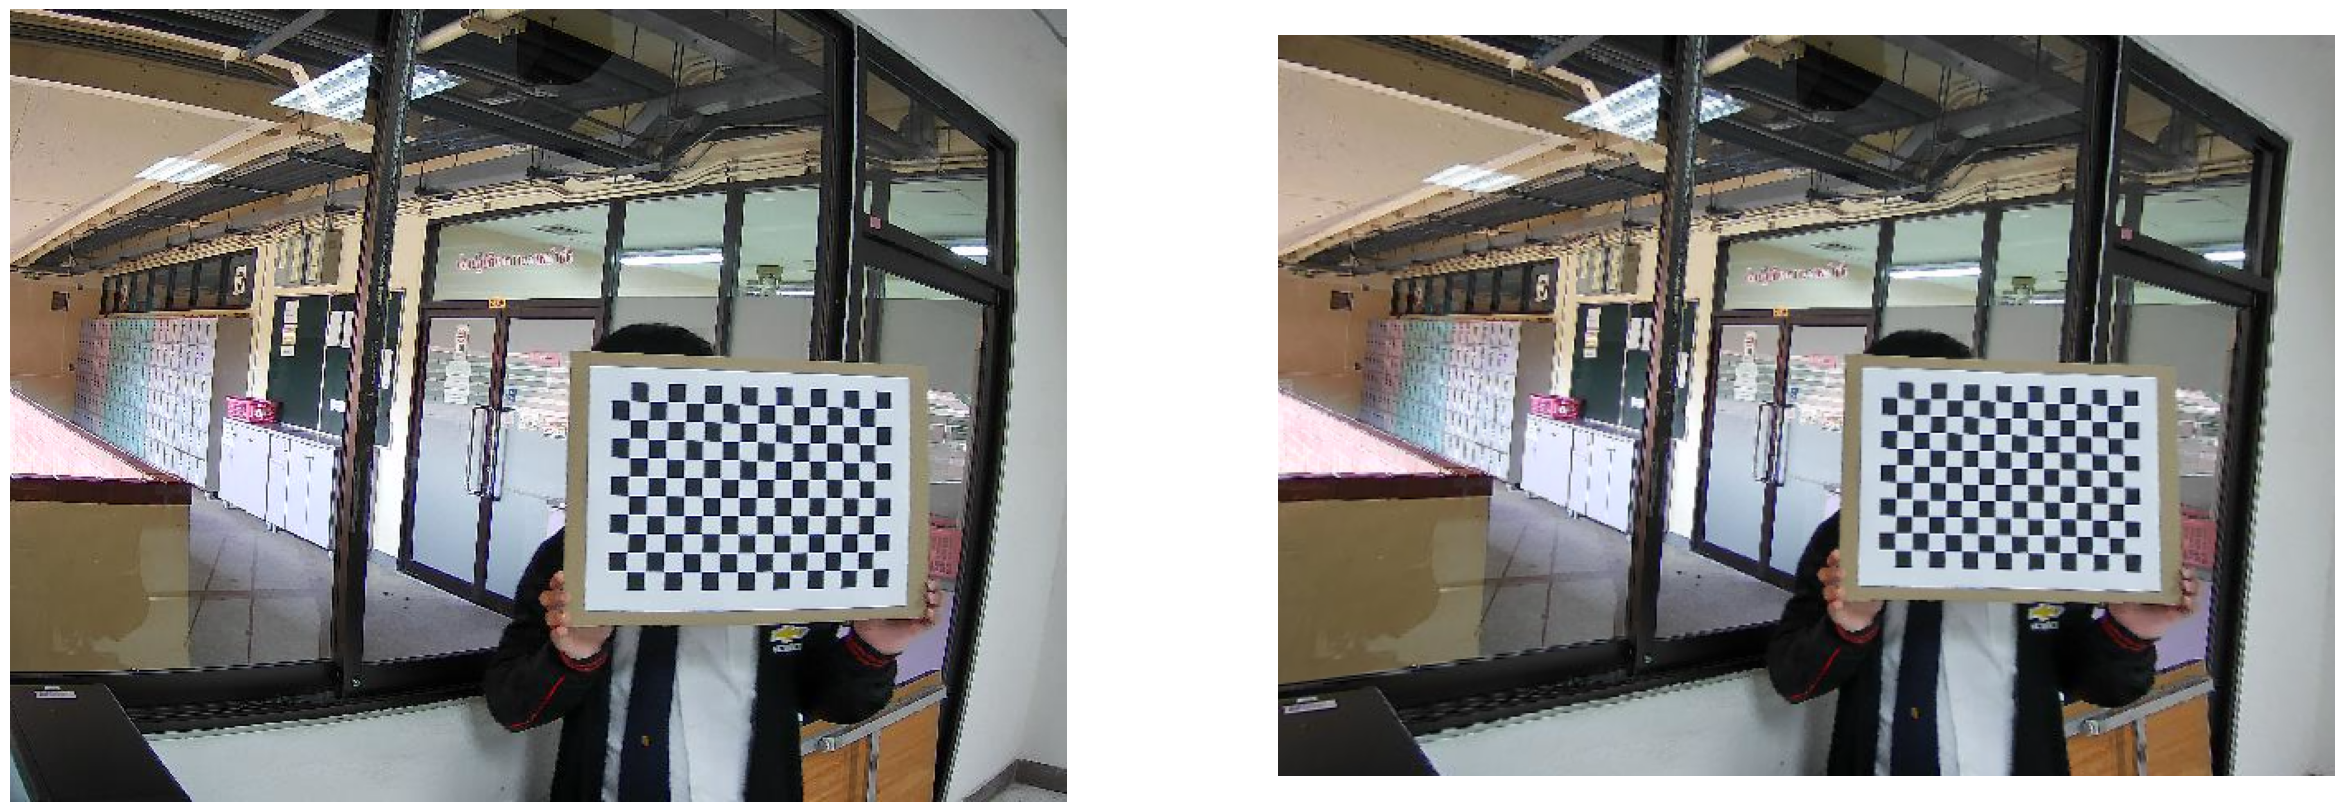

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 30))
ax1.imshow(left_image)
ax1.axis('off')
ax2.imshow(undistorted_left_image)
ax2.axis('off')